In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df=pd.read_csv(r"D:\Downloads\AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.columns=['Date','Number of Passengers']
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


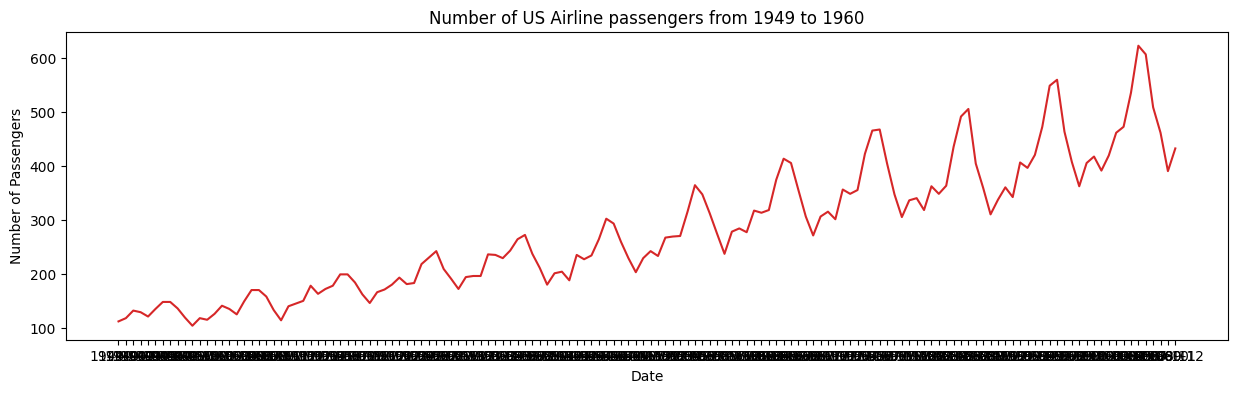

In [4]:
def plot_df(df,x,y,title="",xlabel='Date',ylabel='Number of Passengers',dpi=100):
    plt.figure(figsize=(15,4),dpi=dpi)
    plt.plot(x,y,color='tab:red')
    plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
    plt.show()
plot_df(df,x=df['Date'],y=df['Number of Passengers'],title='Number of US Airline passengers from 1949 to 1960')

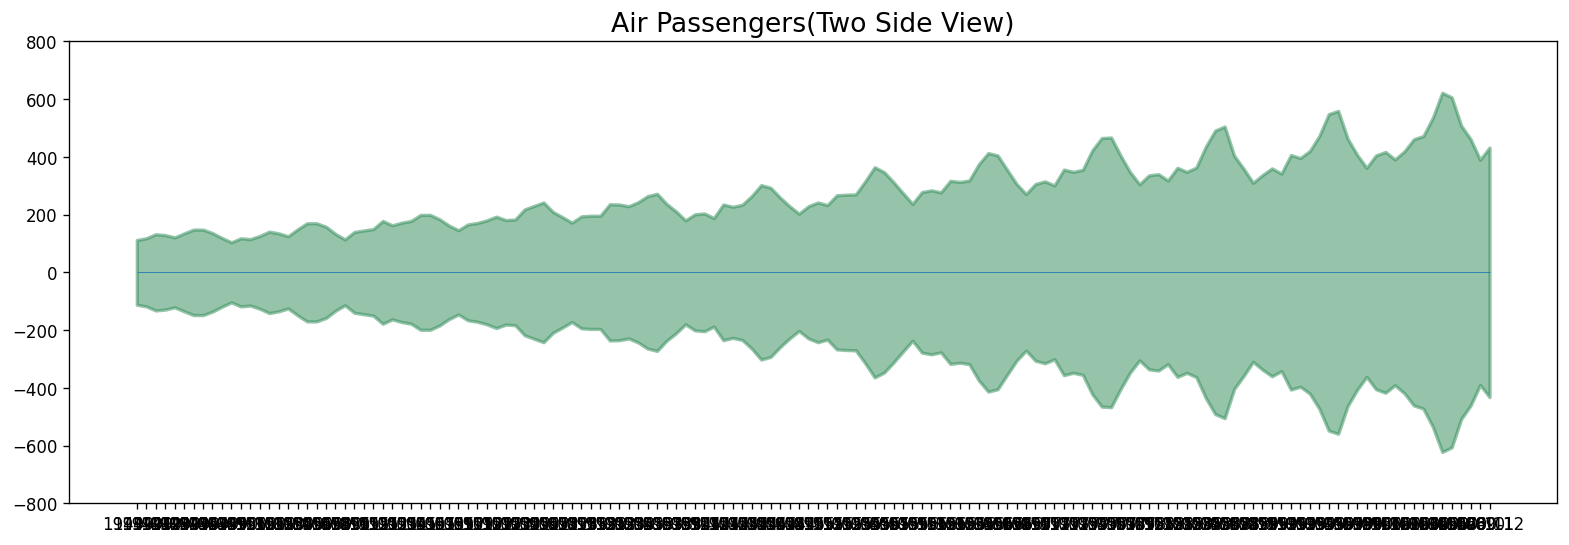

In [5]:
x=df['Date'].values
y1=df['Number of Passengers'].values
fig,ax=plt.subplots(1,1,figsize=(16,5),dpi=120)
plt.fill_between(x,y1=y1,y2=-y1,alpha=0.5,linewidth=2,color='seagreen')
plt.ylim(-800,800)
plt.title('Air Passengers(Two Side View)',fontsize=16)
plt.hlines(y=0,xmin=np.min(df['Date']),xmax=np.max(df['Date']),linewidth=.5)
plt.show()

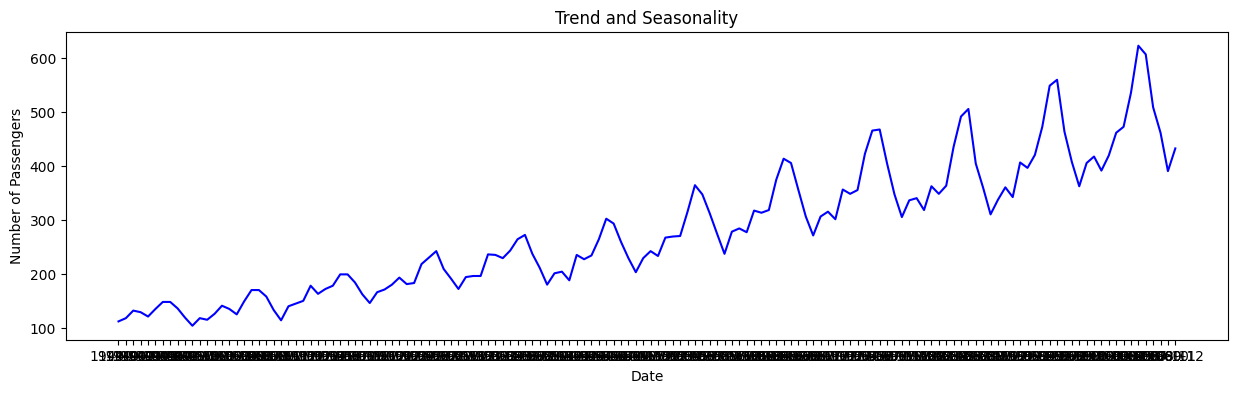

In [6]:
def plot_df(df,x,y,title="",xlabel='Date',ylabel='Number of Passengers',dpi=100):
    plt.figure(figsize=(15,4),dpi=dpi)
    plt.plot(x,y,color='blue')
    plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
    plt.show()
plot_df(df,x=df['Date'],y=df['Number of Passengers'],title='Trend and Seasonality')

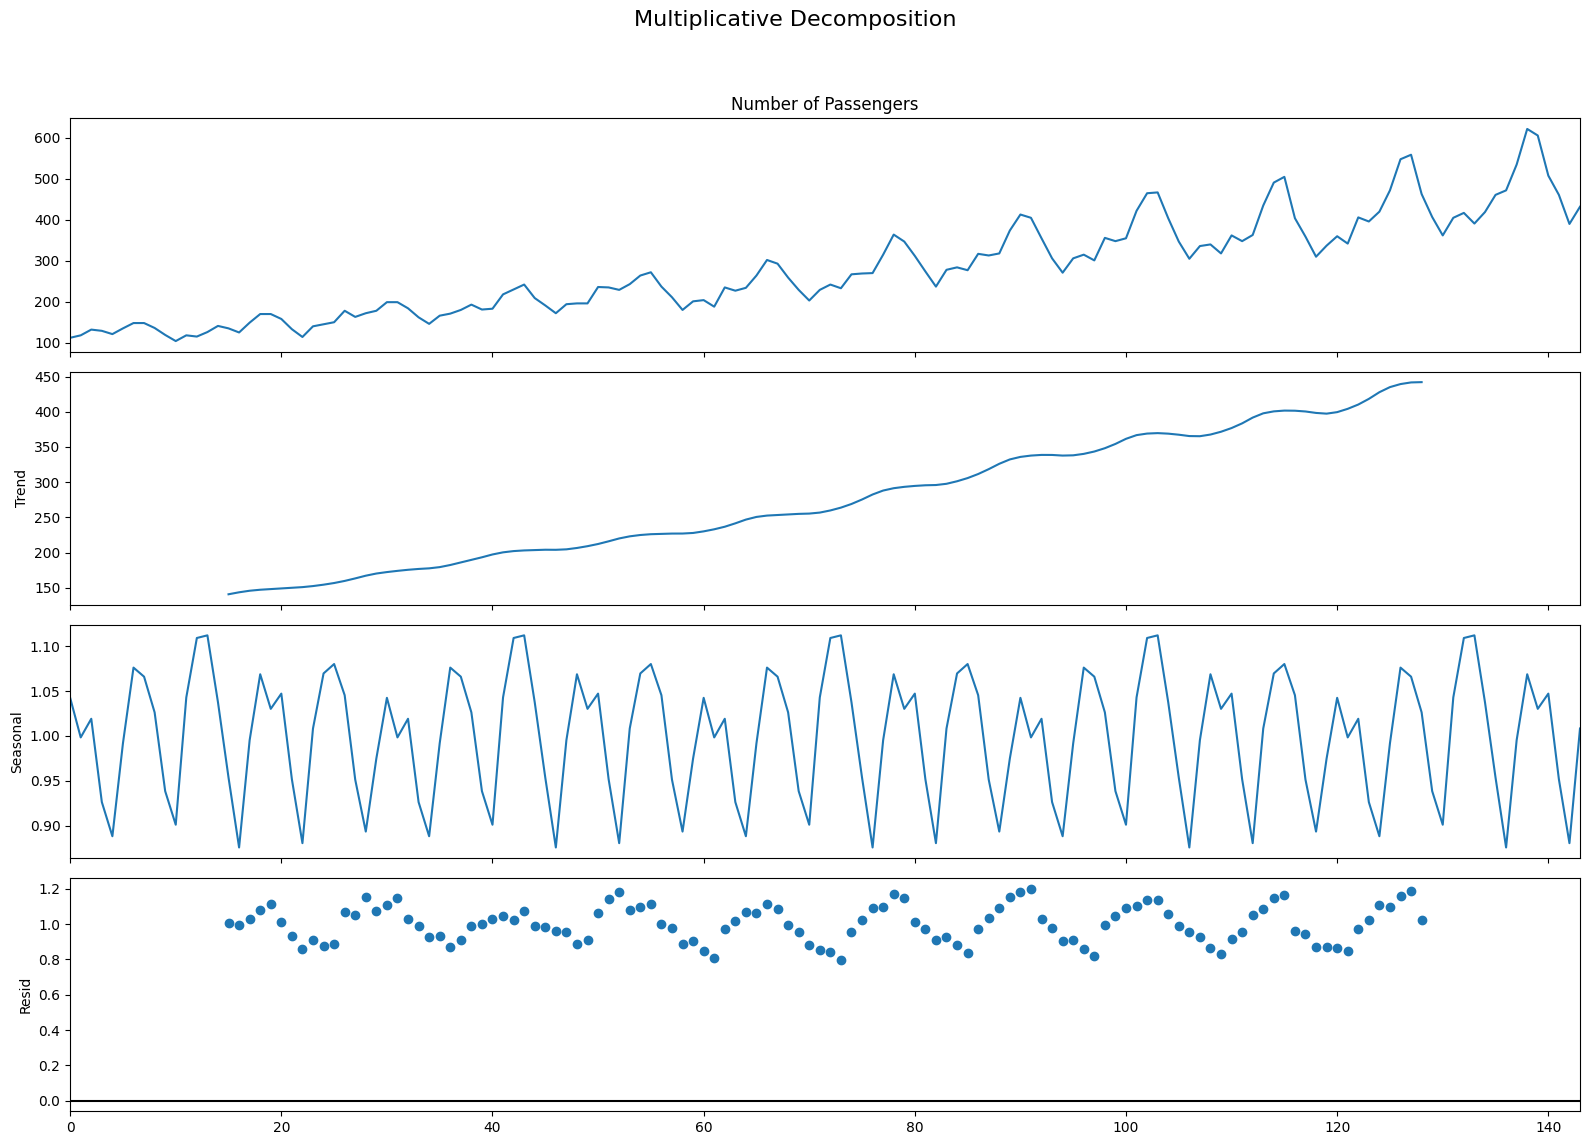

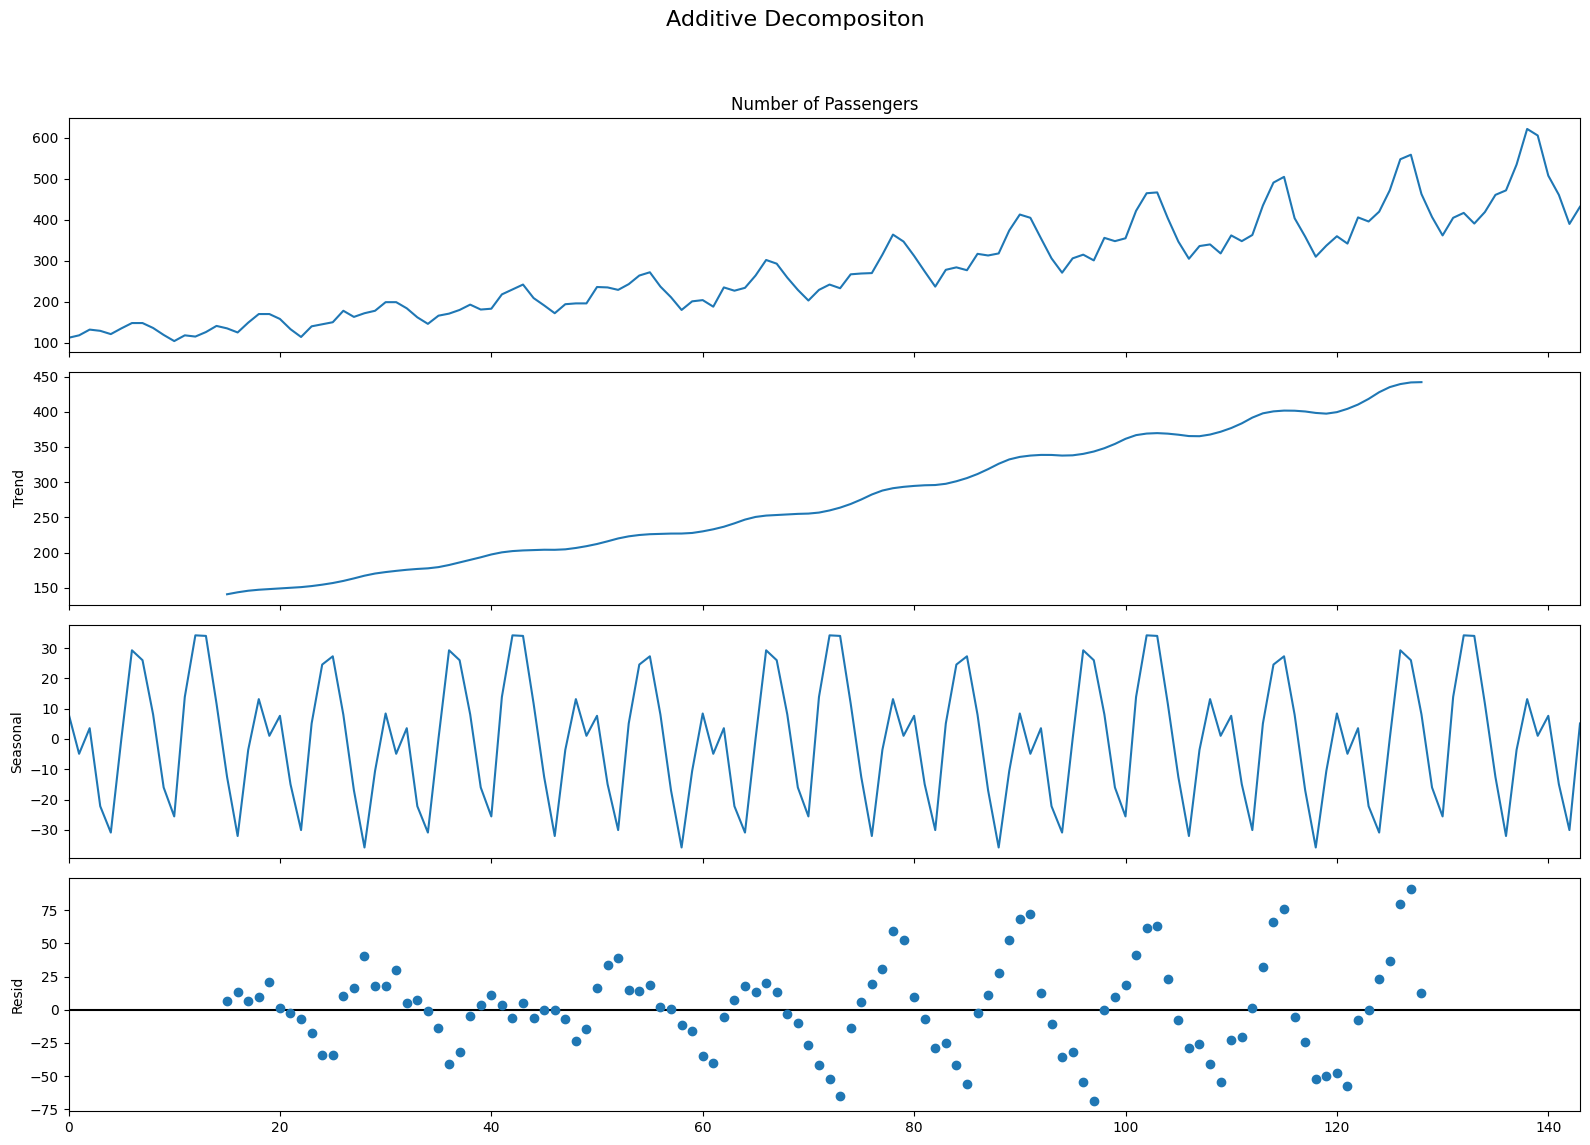

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
multiplicative_decomposition=seasonal_decompose(df['Number of Passengers'],model='multiplicative',period=30)
additive_decomposition=seasonal_decompose(df['Number of Passengers'],model='additive',period=30)
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition',fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95])
additive_decomposition.plot().suptitle('Additive Decompositon',fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

<Axes: title={'center': 'Random White Noise'}>

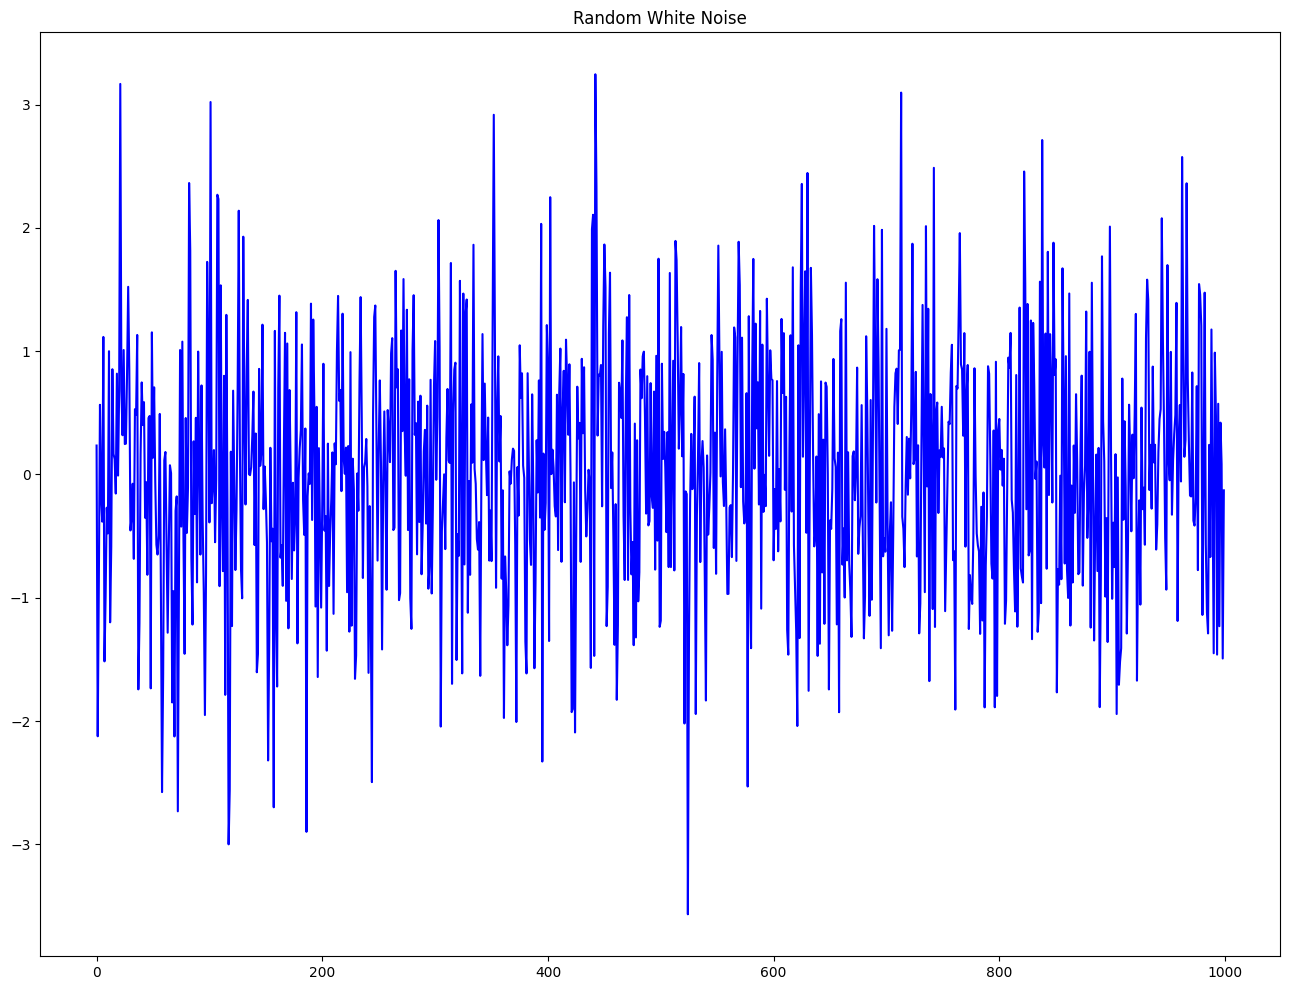

In [8]:
rand_numbers=np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise',color='b')

Text(0.5, 1.0, 'Air Passengers detrented by subtracting the least squares fit')

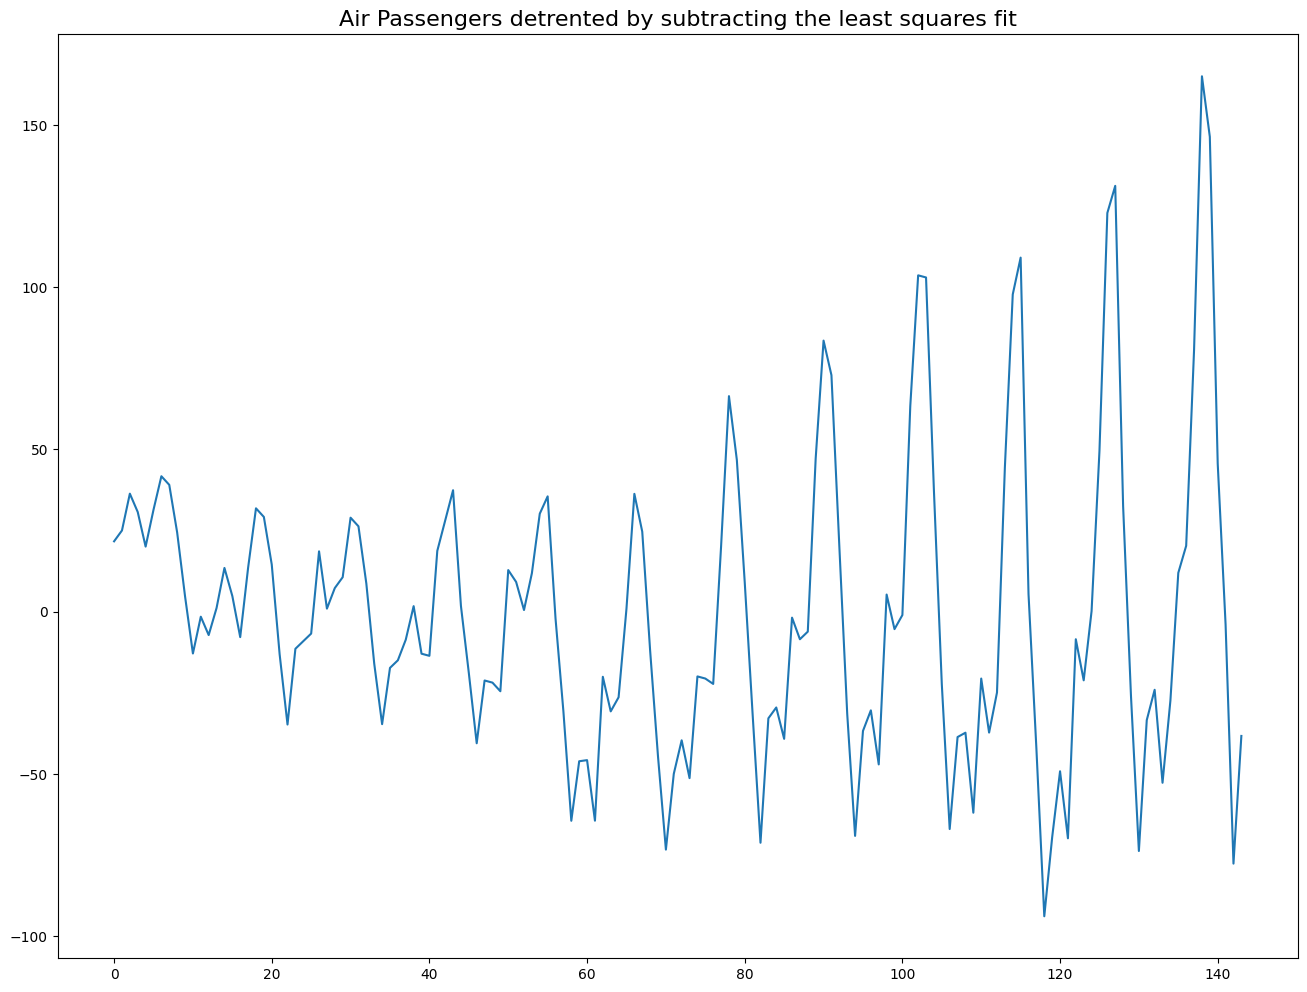

In [9]:
from scipy import signal
detrended=signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrented by subtracting the least squares fit',fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

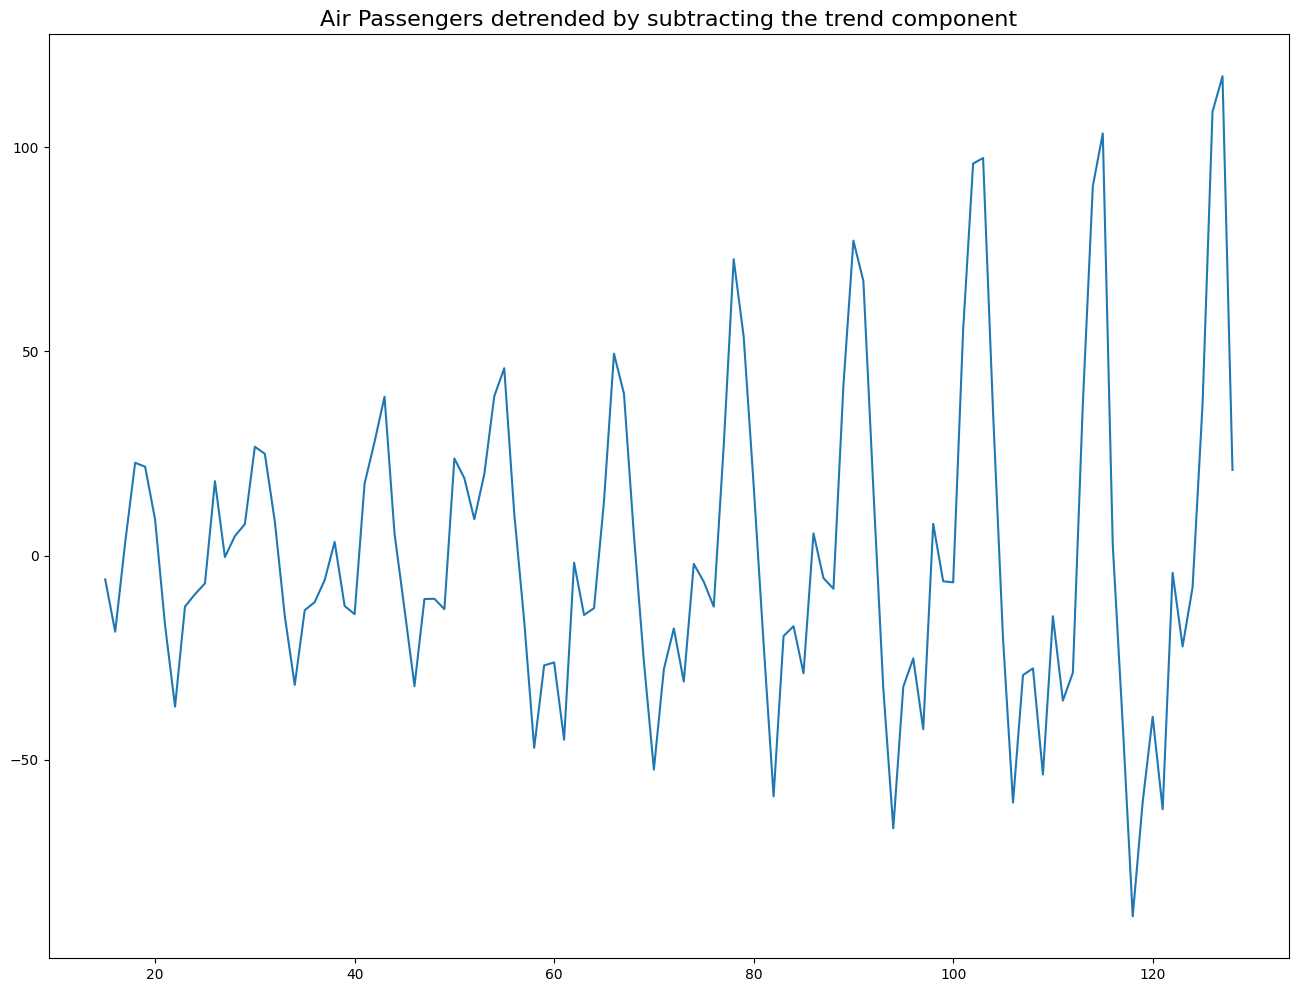

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul=seasonal_decompose(df['Number of Passengers'],model='multiplicative',period=30)
detrended=df['Number of Passengers'].values-result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component',fontsize=16)

[]

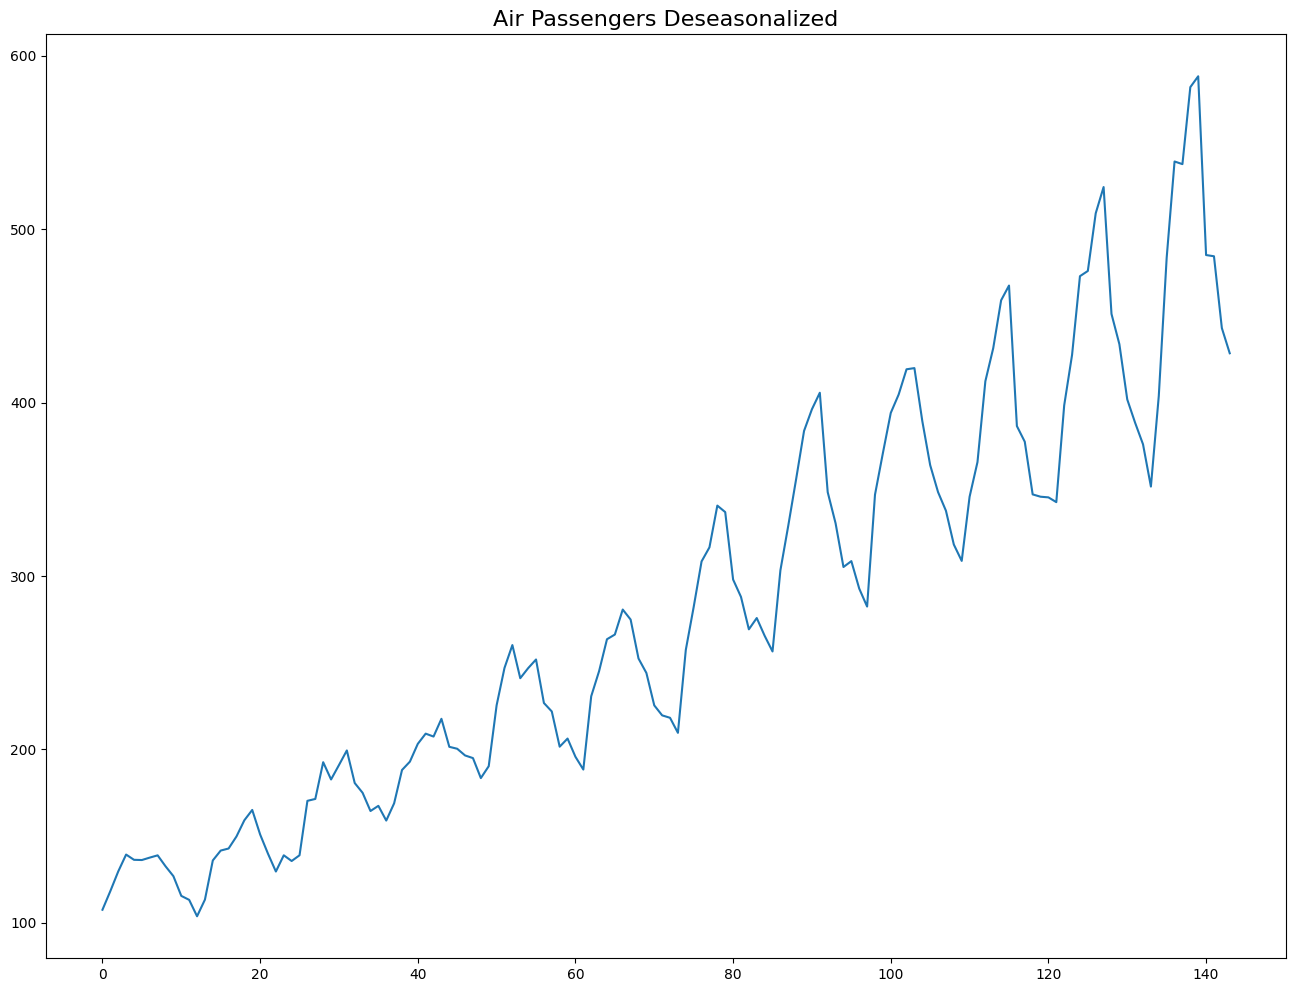

In [11]:
result_mul=seasonal_decompose(df['Number of Passengers'],model='multiplicative',period=30)
deseasonalized=df['Number of Passengers'].values/result_mul.seasonal
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized',fontsize=16)
plt.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

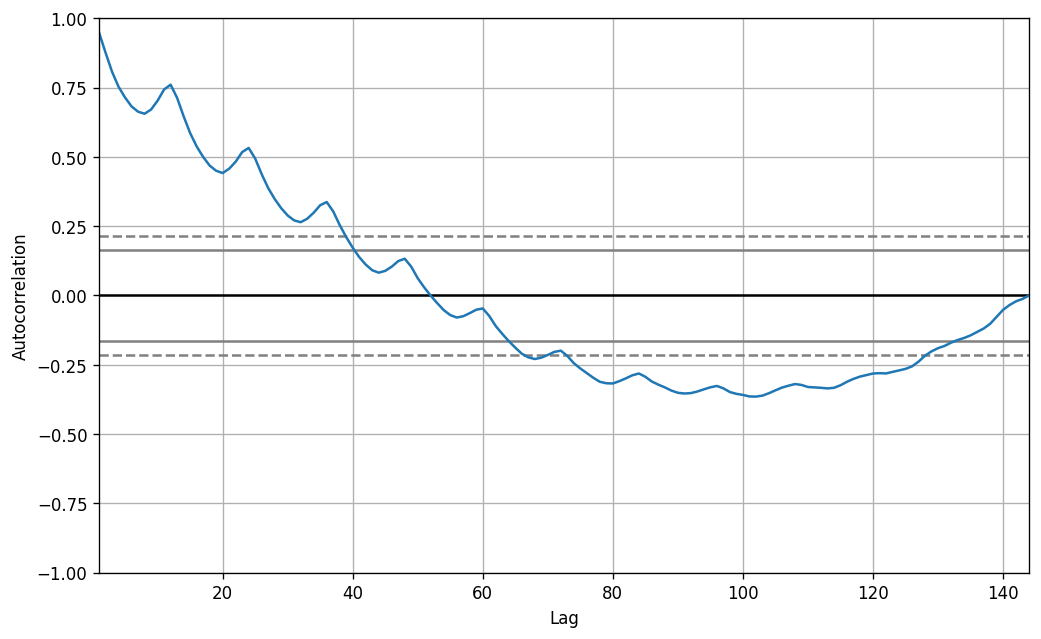

In [12]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(10,6),'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

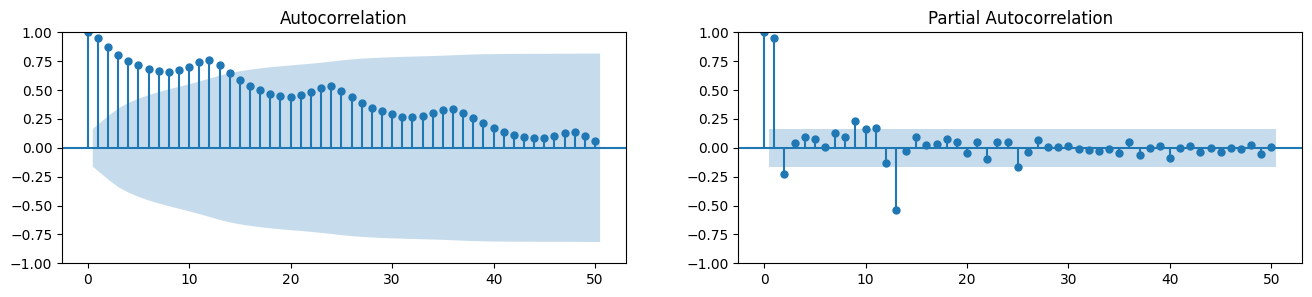

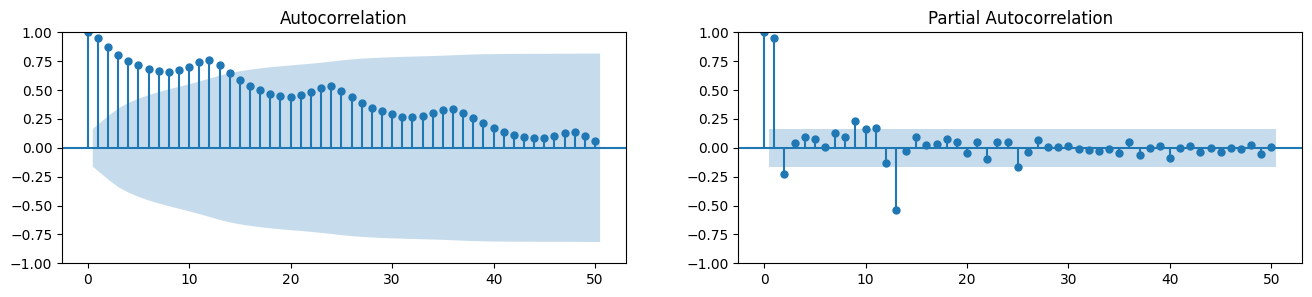

In [13]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,axes=plt.subplots(1,2,figsize=(16,3),dpi=100)
plot_acf(df['Number of Passengers'].tolist(),lags=50,ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(),lags=50,ax=axes[1])

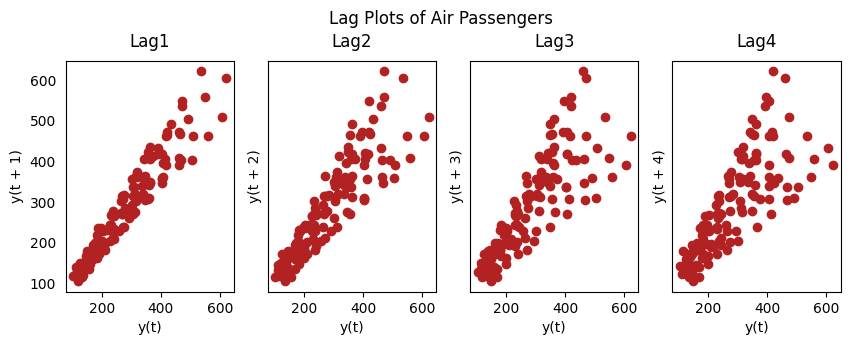

In [14]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left':False,'axes.titlepad':10})
fig,axes=plt.subplots(1,4,figsize=(10,3),sharex=True,sharey=True,dpi=100)
for i,ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'],lag=i+1,ax=ax,c='firebrick')
    ax.set_title('Lag'+ str(i+1))
fig.suptitle('Lag Plots of Air Passengers',y=1.05)
plt.show()